# 패키지 로딩

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
df = pd.read_csv("./dataset/cluster1_2.csv")

# 전체 df에 반영
# df.loc[cluster1_df.index, 'CLUSTER_2'] = cluster1_df['CLUSTER_2']

In [9]:
# 시간 간격: 10분
intervals_per_hour = 6  # 1시간 = 6개
target_idx = 5 * intervals_per_hour  # 5시간 = 30번째

five_hour_data = []

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

# VSL_ID + PORT_NAME 기준으로 그룹핑
for (vsl_id, port_name), group in df.groupby(['VSL_ID', 'PORT_NAME']):
    group = group.sort_values('TIMESTAMP')

    if len(group) > target_idx:
        start_time = group['TIMESTAMP'].iloc[0] # 출발시점
        target_row = group.iloc[target_idx].copy() # 5시간 이후 시점

        time_diff = target_row['TIMESTAMP'] - start_time
        target_row['START_TIME'] = start_time
        target_row['TIME_DIFF'] = time_diff

        five_hour_data.append(target_row)

# 결과 DataFrame 생성
df_5h = pd.DataFrame(five_hour_data).reset_index(drop=True)

# 결과 확인
print("5시간 후 시점 데이터 추출 완료!")
print(f"VSL_ID + PORT_NAME 기준 총 데이터 수: {df_5h.shape[0]}")
display(df_5h.sample(10))

5시간 후 시점 데이터 추출 완료!
VSL_ID + PORT_NAME 기준 총 데이터 수: 91


,COUNTRY,PORT_NAME,VSL_ID,TIMESTAMP,COG,HEADING,LAT,LON,PORT_CD,CLUSTER_1,CLUSTER_2,START_TIME,TIME_DIFF
54,CN,CNSHA,99f4a5e0-f16e-36c5-a162-e49b4a611791,2024-12-10 08:20:00,219.800000,221.500000,34.259700,128.557654,CNSHA,2,2,2024-12-10 03:20:00,0 days 05:00:00
1,CN,CNSHA,06724e0f-5a08-3aa8-b42c-97acf4f8102d,2024-10-26 23:50:00,228.000000,230.000000,34.038467,128.501383,CNSHA,2,2,2024-10-26 18:50:00,0 days 05:00:00
6,CN,CNSHA,156e95f3-7db5-3dc3-87dc-b37d2d9ea374,2024-11-26 22:30:00,226.650000,228.500000,34.267657,128.246626,CNSHA,2,2,2024-11-26 17:30:00,0 days 05:00:00
40,CN,CNSHA,7e6f03e3-85ad-3aa1-9ed2-3b8114e319fc,2024-08-03 06:30:00,231.600000,233.000000,34.258117,128.387492,CNSHA,2,2,2024-08-03 01:30:00,0 days 05:00:00
89,CN,CNSHA,fb98191d-6872-3c06-95b5-7d42c060c1b0,2024-09-07 18:20:00,232.900000,234.000000,34.516462,128.553265,CNSHA,2,2,2024-09-07 13:20:00,0 days 05:00:00
39,CN,CNSHA,79801466-edbb-3210-9372-bafefa2c211e,2024-11-20 01:20:00,231.600000,230.000000,34.067612,127.890490,CNSHA,2,2,2024-11-19 20:20:00,0 days 05:00:00
70,CN,CNSHA,c30cf8ca-2f08-30e0-840f-38f24f11feb5,2024-12-06 07:20:00,223.671429,227.571429,34.279545,128.305977,CNSHA,2,2,2024-12-06 02:20:00,0 days 05:00:00
47,CN,CNSHA,8b1a001c-7f92-3a3e-9fc3-8ae1ca18ceb9,2024-12-12 21:10:00,238.900000,236.000000,34.075055,127.940043,CNSHA,2,2,2024-12-12 16:10:00,0 days 05:00:00
77,CN,CNSHA,d53c1137-3e80-3eb5-8acd-40939b27774d,2024-11-18 06:30:00,236.300000,237.000000,34.290725,128.237268,CNSHA,2,2,2024-11-18 01:30:00,0 days 05:00:00
85,CN,CNSHA,f32994fe-07a1-327d-aff2-adec03d0fe8f,2024-11-27 09:40:00,231.100000,236.500000,34.569617,128.658067,CNSHA,2,2,2024-11-27 04:40:00,0 days 05:00:00


# 독립변수, 종속변수 설정 후 데이터 분리

In [11]:
# 특징 및 타깃 설정
X = df[['LAT', 'LON', 'COG', 'HEADING']]
y = df['CLUSTER_2']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 단일 모델 정의, 최적화, 성능 측정, 교차검증


LogisticRegression 하이퍼파라미터 탐색 중...
Best Params: {'C': 10.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
test Accuracy: 0.8954
교차검증 중 (5-fold)...
CV Accuracy: 0.8938 ± 0.0018
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1138
           1       0.75      0.28      0.41       271
           2       0.90      0.99      0.94      7042
           3       0.00      0.00      0.00       277

    accuracy                           0.90      8728
   macro avg       0.64      0.49      0.53      8728
weighted avg       0.86      0.90      0.87      8728



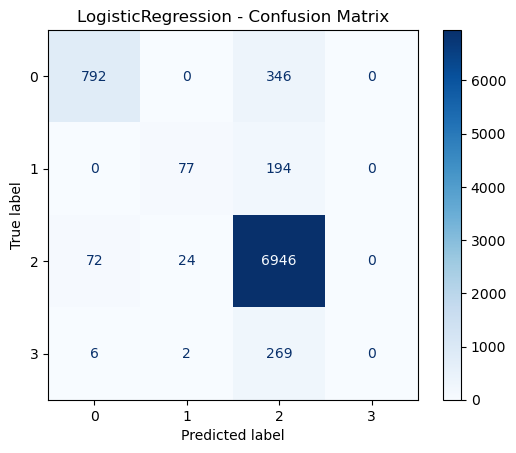


RandomForest 하이퍼파라미터 탐색 중...
Best Params: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
test Accuracy: 0.9453
교차검증 중 (5-fold)...
CV Accuracy: 0.9444 ± 0.0022
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1138
           1       0.89      0.57      0.70       271
           2       0.95      0.99      0.97      7042
           3       0.84      0.43      0.57       277

    accuracy                           0.95      8728
   macro avg       0.91      0.72      0.79      8728
weighted avg       0.94      0.95      0.94      8728



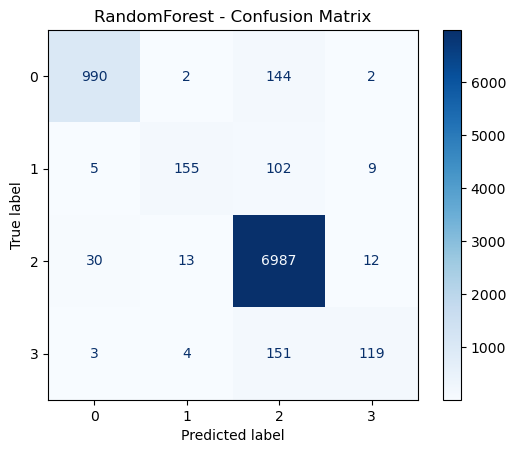


XGBoost 하이퍼파라미터 탐색 중...
Best Params: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
test Accuracy: 0.9419
교차검증 중 (5-fold)...
CV Accuracy: 0.9412 ± 0.0026
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1138
           1       0.88      0.59      0.71       271
           2       0.94      0.99      0.97      7042
           3       0.81      0.41      0.55       277

    accuracy                           0.94      8728
   macro avg       0.90      0.71      0.78      8728
weighted avg       0.94      0.94      0.94      8728



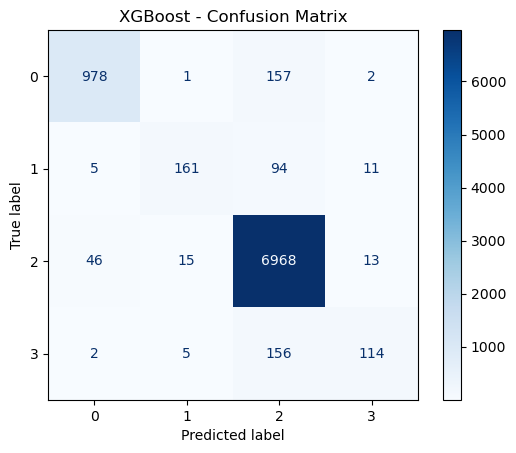


LightGBM 하이퍼파라미터 탐색 중...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 34910, number of used features: 4
[LightGBM] [Info] Start training from score -2.037207
[LightGBM] [Info] Start training from score -3.470272
[LightGBM] [Info] Start training from score -0.214622
[LightGBM] [Info] Start training from score -3.452928
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 128, 'subsample': 0.8}
test Accuracy: 0.9425
교차검증 중 (5-fold)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 27928, number of used features

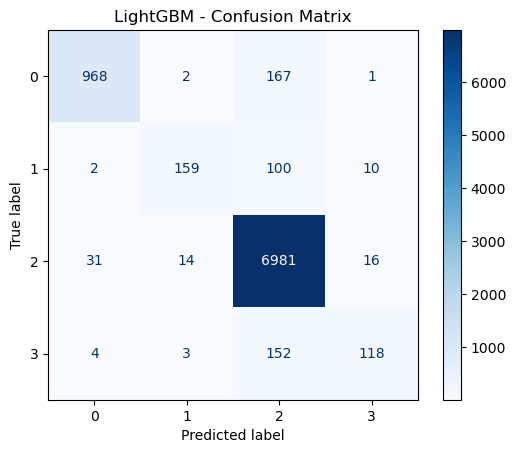


KNN 하이퍼파라미터 탐색 중...
Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
test Accuracy: 0.8767
교차검증 중 (5-fold)...
CV Accuracy: 0.8730 ± 0.0018
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.51      0.64      1138
           1       0.81      0.41      0.54       271
           2       0.89      0.98      0.93      7042
           3       0.61      0.31      0.42       277

    accuracy                           0.88      8728
   macro avg       0.79      0.55      0.63      8728
weighted avg       0.87      0.88      0.86      8728



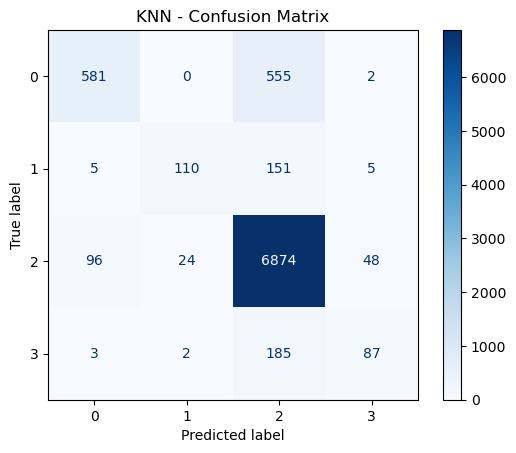

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 기본 모델 정의
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# 하이퍼파라미터 그리드
param_grids = {
    "LogisticRegression": {
        'C': [0.01, 0.1, 1.0, 10.0],               # 정규화 강도
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2'],                        # L1은 liblinear에서만 지원
        'class_weight': [None, 'balanced']        # 불균형 클래스 보정
    },
    "RandomForest": {
        'n_estimators': [100, 200, 300],          # 더 깊은 학습 가능
        'max_depth': [None, 10, 20],              # 트리 깊이 제한 추가
        'min_samples_split': [2, 5, 10],          # 노드 분할 최소 샘플 수
        'min_samples_leaf': [1, 2, 4],            # 리프 노드 최소 샘플 수
        'max_features': ['sqrt', 'log2'],         # 피처 샘플링 전략
        "class_weight": ['balanced']
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0],                  # 부트스트랩 비율
        'colsample_bytree': [0.8, 1.0],           # 피처 샘플 비율
        'gamma': [0, 1, 5]                        # 정보 획득 최소값
    },
    "LightGBM":  {
        'n_estimators': [100, 200, 300],
        'num_leaves': [31, 64, 128],              # 복잡도 조절
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'min_child_samples': [10, 20, 30]         # 리프 노드 최소 샘플 수
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],                               # 거리 측정 방식
        'metric':['euclidean','manhattan']
    }
}

# 결과 저장
best_classifiers = {}
results = {}

# 학습 및 평가 루프
for name, model in models.items():
    print(f"\n{name} 하이퍼파라미터 탐색 중...")

    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_classifiers[name] = best_model

    # 테스트 평가
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"Best Params: {grid.best_params_}")
    print(f"test Accuracy: {acc:.4f}")

    # 교차검증
    print(f"교차검증 중 (5-fold)...")
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # 혼동행렬 시각화
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# 앙상블 정의, 최적화, 성능측정, 교차검증


 Soft Voting Classifier 평가 시작
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 34910, number of used features: 4
[LightGBM] [Info] Start training from score -2.037207
[LightGBM] [Info] Start training from score -3.470272
[LightGBM] [Info] Start training from score -0.214622
[LightGBM] [Info] Start training from score -3.452928
 Voting Test Accuracy: 0.9433
 Voting Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1138
           1       0.94      0.56      0.70       271
           2       0.94      0.99      0.97      7042
           3       0.86      0.40      0.55       277

    accuracy                           0.94      8728
   macro avg       0.93      0.70      0.78      8728
weighted avg       0.94 

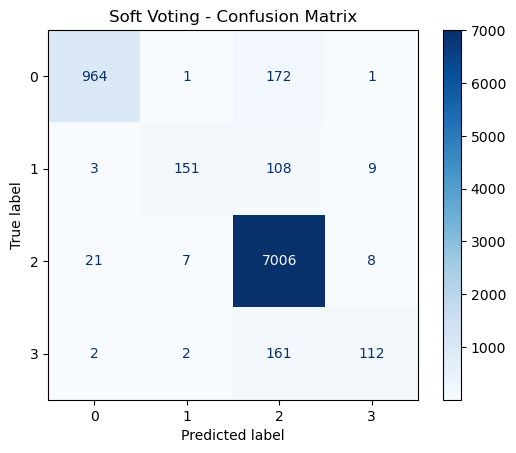


 전체 모델별 정확도 정리:
LogisticRegression: 0.8954
RandomForest: 0.9453
XGBoost: 0.9419
LightGBM: 0.9425
KNN: 0.8767
SoftVoting: 0.9433


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# # 기본 모델 정의
# base_models = {
#     "LogisticRegression": LogisticRegression(),
#     "RandomForest": RandomForestClassifier(random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
#     "LightGBM": LGBMClassifier(random_state=42),
#     "KNN": KNeighborsClassifier()
# }

# # 하이퍼파라미터 그리드
# param_grids = {
#     "LogisticRegression": {
#         'C': [0.01, 0.1, 1.0, 10.0],               # 정규화 강도
#         'solver': ['liblinear', 'lbfgs'],
#         'penalty': ['l2'],                        # L1은 liblinear에서만 지원
#         'class_weight': [None, 'balanced']        # 불균형 클래스 보정
#     },
#     "RandomForest": {
#         'n_estimators': [100, 200, 300],          # 더 깊은 학습 가능
#         'max_depth': [None, 10, 20],              # 트리 깊이 제한 추가
#         'min_samples_split': [2, 5, 10],          # 노드 분할 최소 샘플 수
#         'min_samples_leaf': [1, 2, 4],            # 리프 노드 최소 샘플 수
#         'max_features': ['sqrt', 'log2'],         # 피처 샘플링 전략
#         "class_weight": ['balanced']
#     },
#     "XGBoost": {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [3, 5, 7],
#         'learning_rate': [0.01, 0.05, 0.1],
#         'subsample': [0.8, 1.0],                  # 부트스트랩 비율
#         'colsample_bytree': [0.8, 1.0],           # 피처 샘플 비율
#         'gamma': [0, 1, 5]                        # 정보 획득 최소값
#     },
#     "LightGBM":  {
#         'n_estimators': [100, 200, 300],
#         'num_leaves': [31, 64, 128],              # 복잡도 조절
#         'learning_rate': [0.01, 0.05, 0.1],
#         'subsample': [0.8, 1.0],
#         'colsample_bytree': [0.8, 1.0],
#         'min_child_samples': [10, 20, 30]         # 리프 노드 최소 샘플 수
#     },
#     "KNN": {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance'],
#         'p': [1, 2],                               # 거리 측정 방식
#         'metric':['euclidean','manhattan']
#     }
# }

# # 최적 모델 저장
# best_models = {}
# results = {}

# # 개별 모델 최적화 및 평가
# for name, model in base_models.items():
#     print(f"\n {name} 하이퍼파라미터 튜닝 중...")

#     grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
#     grid.fit(X_train, y_train)

#     best_model = grid.best_estimator_
#     best_models[name] = best_model

#     y_pred = best_model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     results[name] = acc

#     print(f"Best Params: {grid.best_params_}")
#     print(f"Test Accuracy: {acc:.4f}")

#     cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
#     print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

#     print("Classification Report:")
#     print(classification_report(y_test, y_pred))

#     # 혼동행렬 시각화
#     cm = confusion_matrix(y_test, y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot(cmap='Blues')
#     plt.title(f"{name} - Confusion Matrix")
#     plt.show()

# Soft Voting 구성 (최적 모델 조합 사용)
print("\n Soft Voting Classifier 평가 시작")

voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in best_classifiers.items()],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

acc_voting = accuracy_score(y_test, y_pred_voting)
results["SoftVoting"] = acc_voting

print(f" Voting Test Accuracy: {acc_voting:.4f}")
print(" Voting Classification Report:")
print(classification_report(y_test, y_pred_voting))

# 교차검증
cv_scores_voting = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Voting 5-Fold CV Accuracy: {cv_scores_voting.mean():.4f} ± {cv_scores_voting.std():.4f}")

# 혼동행렬 시각화
cm_voting = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_voting)
disp.plot(cmap='Blues')
plt.title("Soft Voting - Confusion Matrix")
plt.show()

# 최종 결과 요약
print("\n 전체 모델별 정확도 정리:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")